# Binary outcome classification model using Likelihood Estimator


In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import copy
from sklearn.metrics import confusion_matrix

In [1]:
#run to import files or token from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"obinnaama","key":"27cebdba53cb0874b886281c296cd75f"}'}

## Dataset 1 : Titanic

# Use API from Kaggle
\[[Source](https://www.kaggle.com/c/titanic/data)]

Columns

* PassengerId
* Survived  -- Expected Outcome
* Pclass
* Name     -- String ingnored 
* Sex      -- is converted into binary data
* Age
* SibSp
* Parch
* Embarked  -- is converted into integer data

In [2]:
# Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/

!kaggle competitions download -c titanic

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.84MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 88.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.2MB/s]


In [0]:
train_data = pd.read_csv('train.csv')
train_data.head()
test_data = pd.read_csv('test.csv')
test_data.head()
test_outcome = pd.read_csv('gender_submission.csv')

cleanup_nums = {"Embarked":     {"S": 1, "C": 2, "Q":3},"Sex": {"male":0, "female":1}}
train_data.replace(cleanup_nums, inplace=True)
test_data.replace(cleanup_nums,inplace=True)

In [0]:
train_data.head()
# Normalizing the dataset
names = ['PassengerId',	'Pclass', 'Sex','Age','SibSp','Parch','Fare','Embarked']

for i in names:
    train_data[i] = (train_data[i] - min(train_data[i])) / (max(train_data[i]) - min(train_data[i]))


#train_data.dropna(inplace = True )
train_data.fillna(0,inplace = True)

train_data.describe()

# Normalizing the dataset
names = ['PassengerId',	'Pclass', 'Sex','Age','SibSp','Parch','Fare','Embarked']

for i in names:
    test_data[i] = (test_data[i] - min(test_data[i])) / (max(test_data[i]) - min(test_data[i]))

#train_data.dropna(inplace = True )
test_data.fillna(0,inplace = True)
#train_data.describe()
#test_outcome.describe()


In [0]:
# Accessing the train data
x_data = train_data.drop(['Ticket','Cabin','Name','Survived'],axis = 1).to_numpy()
y_data =train_data['Survived'].to_numpy()

## Methods


### Activation - Non-linear Transfortmation using Sigmoid function $ \sigma(z) = \frac{1}{1+e^{-z}}$

In [0]:
def activation(x):
    return 1/(1+np.exp(-x))

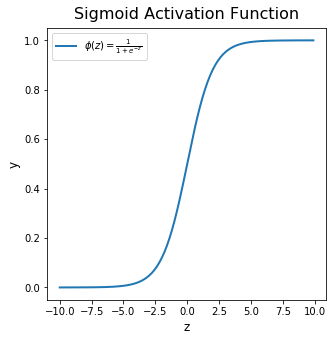

In [11]:
x = np.arange(-10,10,0.1)
y = activation(x)
# Set the font dictionaries (for plot title and axis titles)
title_font = { 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'12'}
plt.figure(figsize=(5,5))
plt.title(r'Sigmoid Activation Function',**title_font)
plt.xlabel("z",**axis_font)
plt.ylabel("y",**axis_font)
plt.plot(x,y,linewidth=2.0,label=r'$\phi(z) = \frac{1}{1+e^{-z}}}$')
plt.legend()
plt.show()

### Forward - outcome from transformation  $ y = \sigma(wx+b)$ 

In [0]:
def forward(input, weight, beta):                                  
    output = beta + np.dot(input,weight.transpose())
    return(activation(output))

# testing the function

#input = np.ones(5)
#weight = np.random.rand(input.shape[0])
#weight = np.ones(5)
#beta = 1 
#y = forward(input,weight,beta)
#print(y)

### Liklihood Estimation 
$L = \frac{1}{N}\sum_{i=1}^{N} \{ y^{(i)}log(\phi(z^{(i)})+(1-y^{(i)})log(1-\phi(z^{(i)})\}$

In [0]:
def LE(output, weight, beta, input):
    return ((1-output)*np.log(1-forward(input,weight,beta))+output*np.log(forward(input,weight,beta))) 

### Forward
The probability value from the tranformation $y = $  

In [0]:
def forward(input, weight, beta):                                    
    output = beta + np.dot(input,weight.transpose())
    return(activation(output))

### Training

In [15]:
# Hyperparameters for training 
learning_rate = 0.001
batch_size = 10
epoch_num = 1000
lamda = 0.01
print(math.ceil(len(y_data)/batch_size))

weights = np.random.rand(1,8)
print(weights.shape)
bias =np.random.rand(1)

def gradient(output,weight,beta,input,lamda):    # for a single step
    gradient_weight = (output - forward(input,weight,beta))*input +lamda*weight
    #gradient_weight = (output - forward(input,weight,beta))*input 
    gradient_bias =  -1/(1+np.exp(-1*(beta + np.dot(input,weight.transpose()))))+output
    
    return gradient_weight, gradient_bias

def backprop(output,weight,beta,input,batch_size,learning_rate,lamda):
    #gradient_weight = []
    #gradient_bias = []
    gradient_weight = 0
    gradient_bias = 0
    for iter in range(epoch_num):
        for batch_iter in range(math.ceil(len(output)/batch_size)):
            #print("batch_iter",batch_iter)
            if batch_iter*batch_size<len(output):
                input_matrix = input[batch_iter*batch_size:(batch_iter+1)*batch_size][:]
                #print("input_matrix",'[',batch_iter*batch_size,':',(batch_iter+1)*batch_size,'][:]')
                output_matrix = output[batch_iter*batch_size:(batch_iter+1)*batch_size]
                #print("output_matrix",output_matrix.shape)
            else:
                input_matrix = input[batch_iter*batch_size:len(output)][:]
                output_matrix = output[batch_iter*batch_size:len(output)]
            
            for i in range(len(output_matrix)):
                gradient_weight1, gradient_bias1 = gradient(output_matrix[i],weight,beta,input_matrix[i],lamda)
                #gradient_weight.append(gradient_weight1)
                #gradient_bias.append(gradient_bias1)
                gradient_weight += gradient_weight1
                gradient_bias +=gradient_bias1 
            gradient_weight = (1/len(output_matrix))*gradient_weight
            gradient_bias = (1/len(output_matrix))*gradient_bias
            
            #weight = np.add(weight,learning_rate*np.mean(gradient_weight,axis= 0))
            #beta = np.add(beta,learning_rate*np.mean(gradient_bias,axis = 0))
            weight = np.add(weight,learning_rate*gradient_weight)
            beta = np.add(beta,learning_rate*gradient_bias)
        le = LE(output,weight,beta,input)
        if (iter%200 ==0):
            print("Epoch","[",iter,"] ","LE" ,np.mean(le),"beta ", beta)
            
    return weight, beta   

print(weights)
weights,bias = backprop(y_data,weights,bias,x_data,batch_size,learning_rate,lamda)
print(weights)

90
(1, 8)
[[0.99491247 0.57374372 0.65728234 0.07760138 0.54754048 0.25910751
  0.28369233 0.39854023]]
Epoch [ 0 ]  LE -1.1232150675389438 beta  [0.22500922]
Epoch [ 200 ]  LE -0.7885193497080054 beta  [-0.74916348]
Epoch [ 400 ]  LE -0.9022612886066615 beta  [-0.69683965]
Epoch [ 600 ]  LE -0.9948235899410944 beta  [-0.62068671]
Epoch [ 800 ]  LE -1.0763126461462447 beta  [-0.53243195]
[[ 0.47760214 -2.86952     3.60980456 -0.82539252  0.32455332  0.02161005
   0.97829905  0.75769706]]


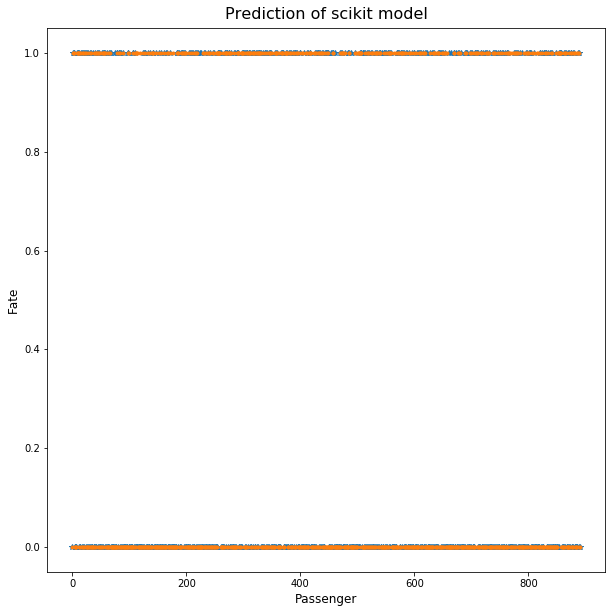

-0.9244934932368533


In [16]:
# the scikit models
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0,max_iter = epoch_num).fit(x_data, y_data)
y_predicted = clf.predict(x_data)

plt.figure(figsize=(10,10))
plt.xlabel("Passenger",**axis_font)
plt.ylabel("Fate",**axis_font)
plt.title("Prediction of scikit model",**title_font)
plt.plot(y_data,'*',y_predicted,'.')
plt.show()
le = LE(y_data, clf.coef_, clf.intercept_, x_data)
print(np.mean(le))

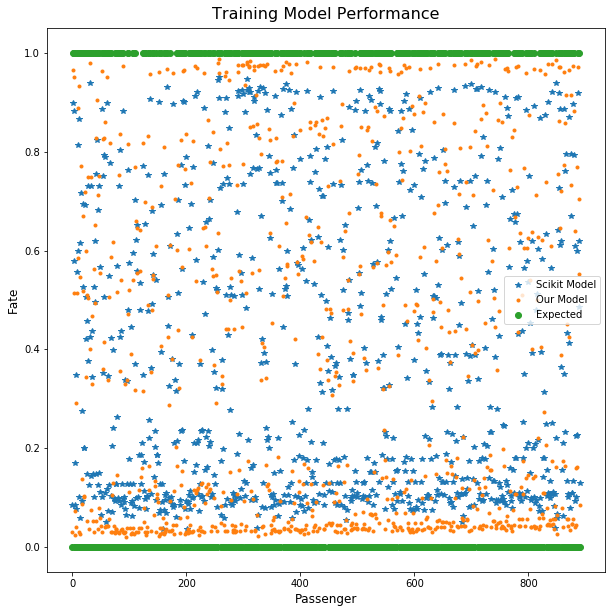

In [17]:
y_predicted1 = forward(x_data,clf.coef_,clf.intercept_)      # Using the coefficients from the scikit model
y_predicted2 = forward(x_data,weights,bias)

#print(y_predicted)
plt.figure(figsize=(10,10))

plt.plot(y_predicted1,'*',label = 'Scikit Model')
plt.plot(y_predicted2,'.',label = 'Our Model')
plt.plot(y_data,'o',label ='Expected')
plt.xlabel('Passenger',**axis_font)
plt.ylabel('Fate',**axis_font)
plt.legend()
plt.title('Training Model Performance',**title_font)
plt.show()

## Postprocess 

In [0]:
def postprocess(input):
    #mean = np.mean(input)
    mean = 0.5

    for i in range(len(input)):
        if(input[i]<mean):
            input[i] = 0
        else:
            input[i] = 1
        
    return mean, input

## Training Data results

In [19]:
y_dummy = copy.deepcopy(y_predicted1)
postprocess(y_dummy)

tn, fp, fn, tp = confusion_matrix(y_dummy,y_data).ravel()
print("The Sklearn Model outcome",(tp+tn)/len(y_data))

y_dummy = copy.deepcopy(y_predicted2)
postprocess(y_dummy)

tn, fp, fn, tp = confusion_matrix(y_dummy,y_data).ravel()
print("Our Model outcome",(tp+tn)/len(y_data))                      # is the accuracy of the model

The Sklearn Model outcome 0.7845117845117845
Our Model outcome 0.7856341189674523


## Testing Data Results

In [20]:
# Accessing the test data
x_data = test_data.drop(['Ticket','Cabin','Name'],axis = 1).to_numpy()
y_data =test_outcome['Survived'].to_numpy()

y_predicted1 = forward(x_data,clf.coef_,clf.intercept_)
y_predicted2 = forward(x_data,weights,bias)

y_dummy = copy.deepcopy(y_predicted1)
postprocess(y_dummy)

tn, fp, fn, tp = confusion_matrix(y_dummy,y_data).ravel()
print("The Sklearn Model outcome",(tp+tn)/len(y_data))

y_dummy = copy.deepcopy(y_predicted2)
postprocess(y_dummy)

tn, fp, fn, tp = confusion_matrix(y_dummy,y_data).ravel()
print("Our Model outcome",(tp+tn)/len(y_data))

The Sklearn Model outcome 0.9665071770334929
Our Model outcome 0.9736842105263158


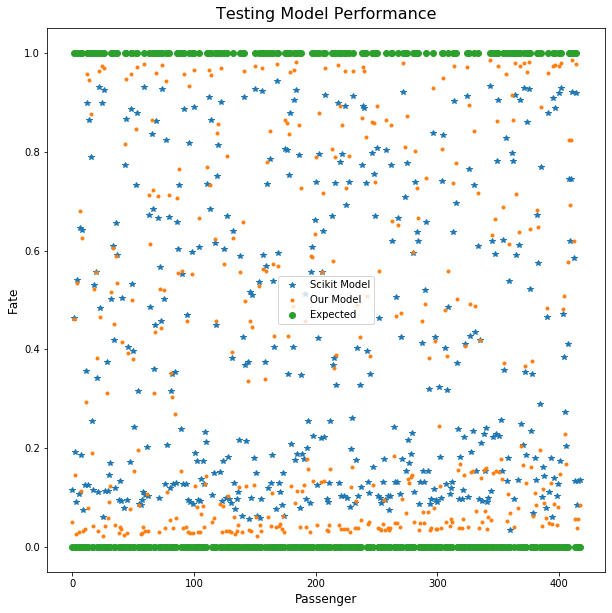

In [21]:
plt.figure(figsize=(10,10))

plt.plot(y_predicted1,'*',label = 'Scikit Model')
plt.plot(y_predicted2,'.',label = 'Our Model')
plt.plot(y_data,'o',label ='Expected')
plt.xlabel('Passenger',**axis_font)
plt.ylabel('Fate',**axis_font)
plt.legend()
plt.title('Testing Model Performance',**title_font)
plt.show()

In [22]:
# Alternate funtion to the above efficiency model
y_dummy2 = np.abs((y_dummy.transpose() - y_data))
(len(y_data)-np.sum(y_dummy2)) / len(y_data)

0.9736842105263158